In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.preprocessing import (create_eog_epochs, create_ecg_epochs,
                               compute_proj_ecg, compute_proj_eog)
import scipy.io

plt.rcParams['figure.figsize'] = [10, 5]

folder = "../data/1122/"
set_file = folder+"fixica.set"
mat_file = folder+"impact locations.mat"

In [19]:
raw = mne.io.read_raw_eeglab(set_file)

Reading /Users/sasha/mds/simpl_eeg_capstone/data/1122/fixica.fdt


<ipython-input-19-2ce043b11bf5>:1: RuntimeWarning: Data file name in EEG.data (1122 fix ica.fdt) is incorrect, the file name must have changed on disk, using the correct file name (fixica.fdt).
  raw = mne.io.read_raw_eeglab(set_file)


In [20]:
raw

<RawEEGLAB | fixica.fdt, 19 x 12026819 (5872.5 s), ~30 kB, data not loaded>

### As Dataframe

In [21]:
raw_df = raw.to_data_frame()
raw_df

,time,Fp1,Fp2,F7,T3,T5,F3,C3,P3,Fz,Cz,Pz,F4,C4,P4,F8,T4,T6,O1,O2
0,0,14.531582,-11.783981,21.614923,16.321362,9.719512,27.709532,20.624149,-12.324463,31.250061,-17.420900,-0.604612,22.614033,13.405896,14.801276,9.054724,31.453531,65.513573,19.535841,66.734680
1,0,14.663340,-11.556257,21.842810,16.447823,9.707135,27.960907,20.854715,-12.314746,31.550734,-17.250202,-0.397661,22.628576,13.758141,14.799129,9.227283,31.685881,65.872292,19.772394,67.123322
2,1,-3.443891,1.930776,-4.740189,0.788001,8.453854,-3.462852,9.965158,12.098608,-8.166456,3.516325,4.724171,-3.717364,-4.112843,1.038013,-2.150941,-6.353374,-14.303813,-7.936352,-11.684968
3,1,-3.307942,2.099311,-4.528029,0.920528,8.478236,-3.215314,10.189683,12.130275,-7.876774,3.677025,4.921148,-3.652322,-3.781625,1.081903,-1.999602,-6.113438,-13.906372,-7.695049,-11.297887
4,2,-20.129866,11.896512,-26.603367,-19.898535,-9.397938,-34.980213,-24.516251,11.010246,-39.996239,10.851233,-3.995591,-30.502254,-22.746386,-23.825443,-12.020208,-40.792339,-84.599731,-29.124195,-71.566116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12026814,5872468,0.431599,-11.203208,-5.401009,-8.842719,-21.067455,-5.125039,-13.202153,-17.706484,-3.385837,-4.494127,-10.534277,10.303233,-0.655697,-3.229792,0.609808,2.967641,4.266589,-12.140933,-21.257788
12026815,5872468,-1.489737,-10.815990,-6.092179,-8.904007,-18.108355,-7.078905,-13.184569,-16.075550,-6.267701,-8.176545,-11.692679,5.932804,-3.483309,-6.786361,-0.193163,1.509319,2.484582,-18.077801,-24.505026
12026816,5872469,-1.968966,-9.105274,-6.192163,-9.354151,-19.288197,-6.856446,-12.696264,-17.376734,-5.699758,-8.334212,-12.509238,4.847283,-4.542382,-8.081605,0.227286,-0.522487,-3.278140,-19.413612,-23.679283
12026817,5872469,-2.041348,-3.647175,-3.493313,-5.040982,-10.048667,-3.964209,-5.937623,-10.364542,-3.652566,-7.439807,-11.316919,0.339351,-3.996915,-8.074924,0.826789,-1.911655,-6.392892,-16.061987,-16.736626


### Channel Names

In [22]:
channel_names = raw.ch_names
channel_names

['Fp1',
 'Fp2',
 'F7',
 'T3',
 'T5',
 'F3',
 'C3',
 'P3',
 'Fz',
 'Cz',
 'Pz',
 'F4',
 'C4',
 'P4',
 'F8',
 'T4',
 'T6',
 'O1',
 'O2']

### Channel positions

In [23]:
raw.get_montage().get_positions()['ch_pos']

OrderedDict([('Fp1', array([-21.90840681,  63.62663337,  -5.28424423])),
             ('Fp2', array([21.90810621, 63.62576037, -5.29598896])),
             ('F7', array([-53.2317449 ,  31.98485919,  -8.63945123])),
             ('T3', array([-66.84435278, -12.99322596,  -7.43361158])),
             ('T5', array([-58.3900796 , -58.3900796 ,  -1.98927356])),
             ('F3', array([-39.98550918,  42.8792089 ,  33.85      ])),
             ('C3', array([-52.68761775,  -9.29024856,  51.84550335])),
             ('P3', array([-43.12261362, -63.93190381,  45.42468348])),
             ('Fz', array([ 0.26592806, 50.78805506, 57.60853015])),
             ('Cz', array([ 0.27739786, -7.94363529, 87.33906176])),
             ('Pz',
              array([ 8.58366287e-15, -7.00909264e+01,  7.13250449e+01])),
             ('F4', array([46.26553757, 48.41411956, 36.35949753])),
             ('C4', array([59.823882  , -9.6893546 , 56.71172322])),
             ('P4', array([ 49.47175167, -70.65298354,

------------------------

## Creating events, epochs, and evoked data from mat file

In [24]:
mat = scipy.io.loadmat(mat_file)
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Mar 23 18:04:27 2021',
 '__version__': '1.0',
 '__globals__': [],
 'baselocs': array([[   24113, 11397293]], dtype=int32),
 'elecmax1': array([[ 1872728,  2226507,  2474660,  2735121,  2977559,  3386348,
          3941813,  4246698,  4488521,  4732498,  4994063,  5446315,
          5696726,  5943973,  6187127,  6455898,  7173445,  7383999,
          7630631,  7871373,  8101104,  8343280,  8580663,  8827988,
          9066266,  9314535,  9578138,  9901110, 10135164, 10384935,
         10633197, 10877445, 11132092]], dtype=int32)}

In [25]:
stim_mock = mat['elecmax1']

events = ([[stim_mock[0][0], 0, 1]])
for i in range(len(stim_mock[0])-1):
    events.append([stim_mock[0][i+1], 0, 1])

events = np.array(events)

print(events.shape)
events

(33, 3)


array([[ 1872728,        0,        1],
       [ 2226507,        0,        1],
       [ 2474660,        0,        1],
       [ 2735121,        0,        1],
       [ 2977559,        0,        1],
       [ 3386348,        0,        1],
       [ 3941813,        0,        1],
       [ 4246698,        0,        1],
       [ 4488521,        0,        1],
       [ 4732498,        0,        1],
       [ 4994063,        0,        1],
       [ 5446315,        0,        1],
       [ 5696726,        0,        1],
       [ 5943973,        0,        1],
       [ 6187127,        0,        1],
       [ 6455898,        0,        1],
       [ 7173445,        0,        1],
       [ 7383999,        0,        1],
       [ 7630631,        0,        1],
       [ 7871373,        0,        1],
       [ 8101104,        0,        1],
       [ 8343280,        0,        1],
       [ 8580663,        0,        1],
       [ 8827988,        0,        1],
       [ 9066266,        0,        1],
       [ 9314535,        

In [26]:
epochs = mne.Epochs(raw, events, tmin=-0.3, tmax=0.7) #tmin/tmax likely have to be adjusted
epochs

Not setting metadata
Not setting metadata
33 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


Number of events,33
Events,1: 33
Time range,-0.300 – 0.700 sec
Baseline,-0.300 – 0.000 sec


In [27]:
event_dict = {'header': 1}

epochs = mne.Epochs(raw, events, tmin=-0.3, tmax=0.7, event_id=event_dict,
                    preload=True)

print(epochs.event_id)

Not setting metadata
Not setting metadata
33 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 33 events and 2049 original time points ...
0 bad epochs dropped
{'header': 1}


In [28]:
evoked = epochs['header'].average()
evoked

<Evoked | 'header' (average, N=33), -0.2998 – 0.7002 sec, baseline -0.299805 – 0 sec, 19 ch, ~334 kB>

In [29]:
evoked.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, T3, T5, F3, C3, P3, Fz, Cz, Pz, F4, C4, P4, F8, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 19 items (19 EEG)
 highpass: 0.0 Hz
 lowpass: 1024.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 2048.0 Hz
>

-----------

### Covariance

In [30]:
cov = mne.compute_covariance(epochs)
cov

Computing rank from data with rank=None
    Using tolerance 5.5e-11 (2.2e-16 eps * 19 dim * 1.3e+04  max singular value)
    Estimated rank (eeg): 19
    EEG: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 67617
[done]


<Covariance | size : 19 x 19, n_samples : 67616, data : [[ 8.11202478e-11 -2.47137404e-11  4.87856180e-11  6.23153822e-11
   6.66265999e-11  1.20697866e-10  1.04431571e-10  9.53871654e-11
   1.39206453e-10  1.22154480e-10  1.02247170e-10  1.82804081e-10
   1.45723377e-10  1.09419006e-10  4.55153540e-11  7.55028837e-11
   7.17975265e-11  7.00990365e-11  6.27876639e-11]
 [-2.47137404e-11  7.82915400e-11  8.83971773e-12  3.25125535e-12
   8.50537500e-12 -1.24569083e-11  1.55185406e-11  1.22719950e-11
  -1.89708559e-11  1.48422354e-12  3.15699339e-12 -1.10369124e-10
  -4.61387841e-11 -2.23437975e-11 -7.96139920e-12 -2.80962554e-11
  -1.79033148e-11  2.82041619e-12 -9.14071449e-12]
 [ 4.87856180e-11  8.83971773e-12  4.19947625e-11  5.03073023e-11
   5.82029701e-11  8.39497987e-11  7.92850514e-11  7.50011851e-11
   9.54403687e-11  8.08901245e-11  7.34685439e-11  8.73833470e-11
   7.79956348e-11  6.56319622e-11  2.55236275e-11  4.38673316e-11
   5.69132046e-11  6.36805338e-11  5.12421758e-11]

Computing rank from covariance with rank=None
    Using tolerance 1e-13 (2.2e-16 eps * 19 dim * 25  max singular value)
    Estimated rank (eeg): 11
    EEG: rank 11 computed from 19 data channels with 0 projectors


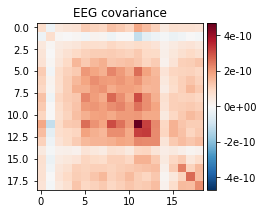

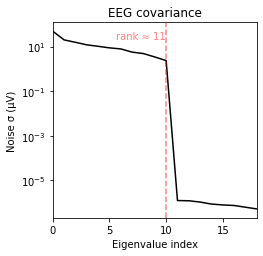

(<Figure size 273.6x266.4 with 2 Axes>, <Figure size 273.6x266.4 with 1 Axes>)

In [31]:
mne.viz.plot_cov(cov, epochs.info)

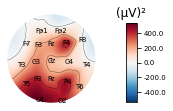

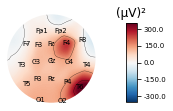

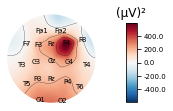

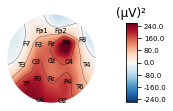

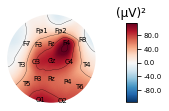

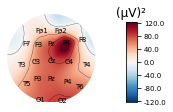

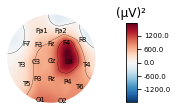

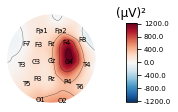

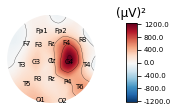

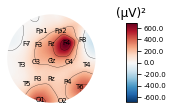

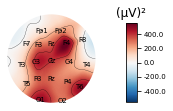

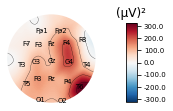

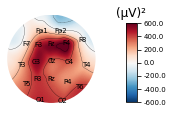

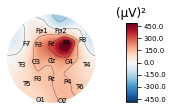

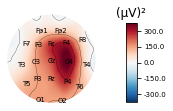

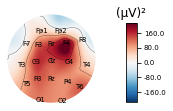

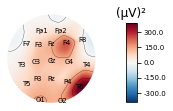

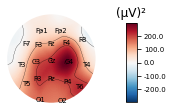

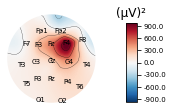

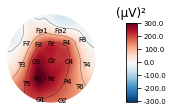

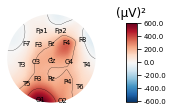

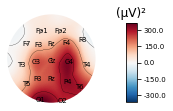

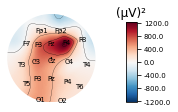

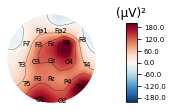

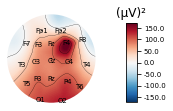

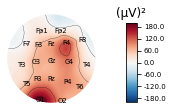

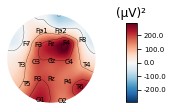

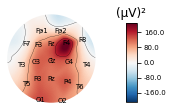

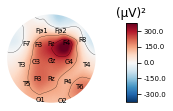

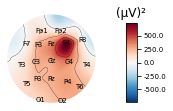

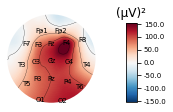

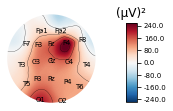

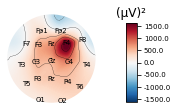

In [32]:
for i in range(len(epochs)):
    cov = mne.compute_covariance(epochs[i], verbose=False)
    cov.plot_topomap(epochs.info,show_names=True)

In [41]:
# Compute connectivity for band containing the evoked response.
sfreq = raw.info['sfreq'] 

# exclude the baseline period
#tmin = 0.0  
fmin, fmax = 0, np.Inf #4., 9.

con, freqs, times, n_epochs, n_tapers = mne.connectivity.spectral_connectivity(
    epochs, method='pli', mode='fourier', sfreq=sfreq, fmin=fmin, fmax=fmax,
    faverage=True, mt_adaptive=False, n_jobs=1)

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 171 connections
    using t=-0.300s..0.700s for estimation (2049 points)
    frequencies: 0.0Hz..1023.5Hz (1025 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: PLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    computing connectivity for epoch 8
    computing connectivity for epoch 9
    computing connectivity for epoch 10


/opt/miniconda3/lib/python3.8/site-packages/mne/connectivity/spectral.py:1010: RuntimeWarning: divide by zero encountered in double_scalars
  5. / np.min(fmin), five_cycle_freq))
<ipython-input-41-78e99d877022>:8: RuntimeWarning: fmin=0.000 Hz corresponds to 0.000 < 5 cycles based on the epoch length 1.000 sec, need at least inf sec epochs or fmin=4.998. Spectrum estimate will be unreliable.
  con, freqs, times, n_epochs, n_tapers = mne.connectivity.spectral_connectivity(


    computing connectivity for epoch 11
    computing connectivity for epoch 12
    computing connectivity for epoch 13
    computing connectivity for epoch 14
    computing connectivity for epoch 15
    computing connectivity for epoch 16
    computing connectivity for epoch 17
    computing connectivity for epoch 18
    computing connectivity for epoch 19
    computing connectivity for epoch 20
    computing connectivity for epoch 21
    computing connectivity for epoch 22
    computing connectivity for epoch 23
    computing connectivity for epoch 24
    computing connectivity for epoch 25
    computing connectivity for epoch 26
    computing connectivity for epoch 27
    computing connectivity for epoch 28
    computing connectivity for epoch 29
    computing connectivity for epoch 30
    computing connectivity for epoch 31
    computing connectivity for epoch 32
    computing connectivity for epoch 33
    assembling connectivity matrix
[Connectivity computation done]


In [69]:
# visualize connectivity in 3D:
figure = mne.viz.plot_sensors_connectivity(epochs.info, con[:,:,0])
mne.viz.set_3d_view(figure)

In [49]:
type(figure)

mne.viz.backends._pyvista._Figure

In [77]:
# power envelope correlation between orthogonalized signals 
env_con = mne.connectivity.envelope_correlation(epochs, combine = None)
env_con.shape

(33, 19, 19)

In [88]:
select_epoch = 2

# visualize connectivity in 3D:
figure = mne.viz.plot_sensors_connectivity(
    epochs[select_epoch].info, 
    env_con[select_epoch], 
    cbar_label=f"Epoch {select_epoch} Connectivity")
mne.viz.set_3d_view(figure)

In [104]:
epochs.get_montage().get_positions()

{'ch_pos': OrderedDict([('Fp1',
               array([-21.90840681,  63.62663337,  -5.28424423])),
              ('Fp2', array([21.90810621, 63.62576037, -5.29598896])),
              ('F7', array([-53.2317449 ,  31.98485919,  -8.63945123])),
              ('T3', array([-66.84435278, -12.99322596,  -7.43361158])),
              ('T5', array([-58.3900796 , -58.3900796 ,  -1.98927356])),
              ('F3', array([-39.98550918,  42.8792089 ,  33.85      ])),
              ('C3', array([-52.68761775,  -9.29024856,  51.84550335])),
              ('P3', array([-43.12261362, -63.93190381,  45.42468348])),
              ('Fz', array([ 0.26592806, 50.78805506, 57.60853015])),
              ('Cz', array([ 0.27739786, -7.94363529, 87.33906176])),
              ('Pz',
               array([ 8.58366287e-15, -7.00909264e+01,  7.13250449e+01])),
              ('F4', array([46.26553757, 48.41411956, 36.35949753])),
              ('C4', array([59.823882  , -9.6893546 , 56.71172322])),
              (

In [117]:
type(fig)

matplotlib.figure.Figure

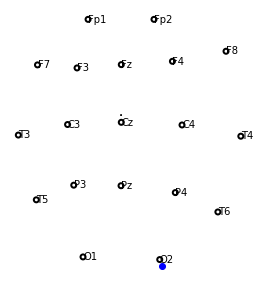

Creating RawArray with float64 data, n_channels=19, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


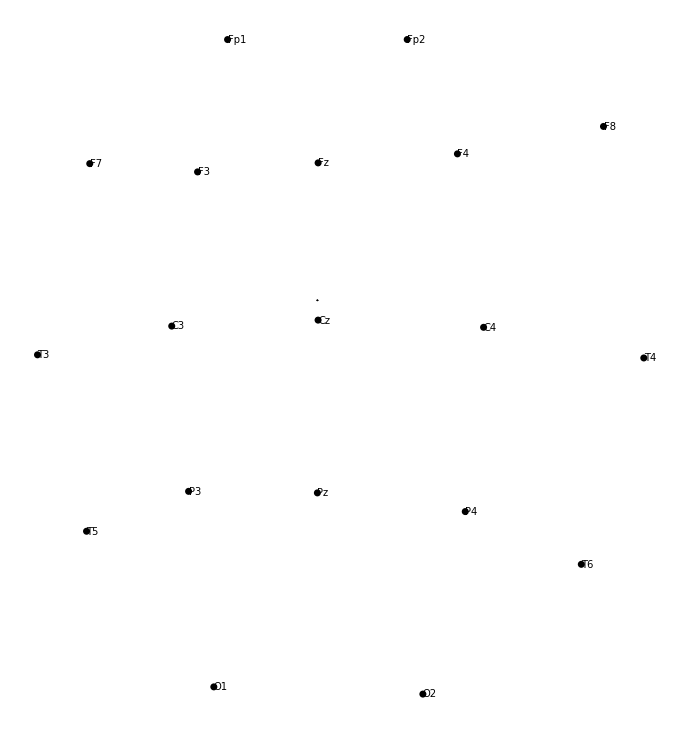

In [292]:
coord1 = epochs.get_montage().get_positions()["ch_pos"]['O2'];

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(coord1[0],coord1[1], color="blue");
raw.plot_sensors(axes=ax, show_names=True, ch_groups="selection", );
plt.show();
epochs.get_montage().plot();

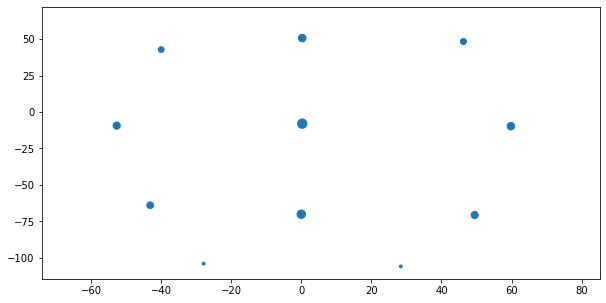

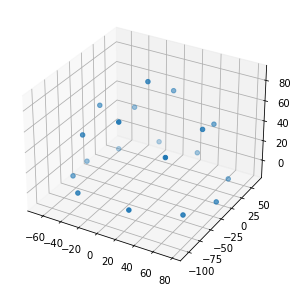

In [291]:
import pandas as pd
df = pd.DataFrame(epochs.get_montage().get_positions()["ch_pos"])
plt.scatter(df.loc[0], df.loc[1], df.loc[2])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df.loc[0], df.loc[1], df.loc[2])
plt.show()